# ALGORITMO BASADO EN REDES NEURONALES, PARA MEDIR OBJETOS TRIDIMENSIONALES EN COORDENADAS RECTANGULARES


## *Reporte del desarrollo de análisis de imágenes y partículas con OpenCV y Python*


Facultad de Ciencias de la Electrónica<br>
Benemérita Universidad Autónoma de Puebla<br>
Coordinador: Dr. Gustavo Mendoza Torres<br>

<table><tr>
<td> <img src="https://www.vippng.com/png/detail/347-3477890_buap-logo-benemrita-universidad-autnoma-de-puebla.png" width=200 height=200 />  </td>
<td> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7IetvlRdpTMJilJTTfl5kshLM4HBeh5IXqJ4PYBZQCOObnAIyqEEu-V0iDr-BE1lzZA8&usqp=CAU" width=200 height=300 /> </td>
</tr></table>


Alumnos:
- *Francisco Hernández Rodríguez 201619851*
- *Heidi Rebeca Rojas Montalvo  201508965*
- *Juan Miguel Ovando Castillo 201627820*
- *José Ángel Garzón Gonzáles 201635406*

Verano 2021

## Objetivo
Mediante el lenguaje de programación Python 3 desarrollar un algoritmo para obtener mediciones sobre partículas de ceniza volcánica.

### Actividades

- Buscar el software adecuado para llevar a cabo las mediciones
- Seleccionamos el software que cumple con nuestros requisitos 
- Analizar y estudiar el software seleccionado
- Análisis de ventajas y limitantes del software
- Vincular el software seleccionado con Python
- Programación para identificación de las imágenes
- Análisis de las características geométricas del objeto y mediciones
- Resultados finales

### Importancia del análisis de partículas 

El análisis del tamaño de las partículas se utiliza para caracterizar la distribución del tamaño de las partículas en una muestra determinada. El análisis del tamaño de partículas se puede aplicar a materiales sólidos, suspensiones, emulsiones e incluso aerosoles. Hay muchos métodos diferentes empleados para medir el tamaño de las partículas. Algunos métodos de tamaño de partículas se pueden usar para una amplia gama de muestras, pero algunos solo se pueden usar para aplicaciones específicas. Es muy importante seleccionar el método más adecuado para diferentes muestras, ya que diferentes métodos pueden producir resultados bastante diferentes para el mismo material. 

### Sobre las partículas de ceniza volcánicas 

Las partículas de ceniza volcánica tienen una amplia distribución de formas y tamaños. Su análisis morfométrico emplea diferentes técnicas, como la observación por microscopio electrónico de barrido (SEM) o el análisis de difracción láser. Las partículas de ceniza, derivadas del vidrio, roca y cristal volcánico, presentan una estructura de tipo vesicular con numerosas cavidades, en la que generalmente dominan las formas irregulares con bordes afilados y dentados, lo cual torna a la ceniza en un material abrasivo. El tamaño, por consenso de un grupo de expertos para referirse a ceniza volcánica, es de 2 milímetros de
diámetro o menos. El límite superior en el tamaño de las partículas se determina mediante procesos de sedimentación, el cual depende del diámetro y la forma de la partícula. [[1]](https://www1.cenapred.unam.mx/SUBCUENTA/6a%20SESI%C3%93N%20EXTRAORDINARIA/3.%20GOES_16/CENIZA_REPORTE_3.4_ABRIL_15_2019_BUENO_CON_%C3%8DNDICE+TABLAS+FIGURAS_C.pdf)

### Trabajo previo 

El primer acercamiento al analisis de partículas de ceniza volcánica se realizó con [ImageJ](https://imagej.net/) el cual es un software abierto para el procesamiento de imágenes. El cual contiene una gran variedad de [Funciones y operaciones](https://imagej.net/imaging/) que podemos aplicar sobre imágenes, ya sea utilizando su IDE [FIJI](https://imagej.net/software/fiji/) o utilizando una de sus herramientas más poderosas, la posibilidad de realizar scripts en [diferentes lenguajes](https://imagej.net/scripting/) como Python para ejecutar macros o comandos sobre nuestras imágenes. De esta forma un primer script utilizando Python 2 se ideo para obtener las mediciones de las particulas de ceniza volcánica de algunas [imágenes tomadas con microscopio](https://github.com/JMCastle98/PP_ImageJ/tree/main/Manual):


```python
from ij import IJ
from ij.io import FileSaver
from ij.io import OpenDialog
import os
from ij.process import ImageStatistics as IS
import ij.gui.PolygonRoi
import ij.gui.Roi
from ij.plugin.frame import RoiManager
from ij import IJ, ImagePlus
from ij.plugin import CanvasResizer
from ij.process import ImageProcessor
from ij.plugin.filter import ThresholdToSelection
from time import sleep

od = OpenDialog("Chose a file:", None)

filename = od.getFileName()
directory = od.getDirectory()
path = od.getPath()

imp = IJ.openImage(path);
imp.getProcessor().setThreshold(60, 255, ImageProcessor.NO_LUT_UPDATE)
roi = ThresholdToSelection.run(imp)
imp.setRoi(roi)
maskimp = ImagePlus("Mask", imp.getMask())
maskimp.show()

IJ.run(maskimp, "Analyze Particles...", "size=2000.00-Infinity display include add");

IJ.run("From ROI Manager","");

IJ.renameResults("Results","Resultados_Particulas");

IJ.saveAs("Results", "C:/Users/JMCas/Downloads/Resultados_Particulas.csv");

IJ.deleteRows(0,103);

rm = RoiManager().getInstance()
total_rois = rm.getCount()

lectura_1=total_rois;

for roi in range(total_rois):
	rm.select(roi)
	IJ.run('Convex Hull')
	IJ.run('Measure')
	sleep(1)
print(rm)

IJ.renameResults("Results", "Cascaras_Convexas");

IJ.saveAs("Results","C:/Users/JMCas/Downloads/Cascaras_Convexas.csv")

IJ.deleteRows(0,103);

print("Fin del Programa")
```

Este código tiene los siguientes pasos en su algoritmo:
- Búsqueda y apertura de los archivos de imágenes
- Ajustar Threshold
- Aplicar máscara de Threshold
- Ejecutar análisis de partículas ( excluyendo las de menor tamaño)
- Abrir ROI (Region of Interest) Manager para obtener medidas individuales
- Guardar medidas
- Aplicar cáscara convexa para cada partícula
- Guardar medidas
- Fin del programa

Las limitaciones iniciales de este algoritmo están asociadas al software ImageJ el cuál cuenta con funciones limitadas al momento de ejecutar scripts puesto que su lenguaje nativo es Java, de modo que solo ciertas herramientas están disponibles para Python el cual solo se puede utilizar en su versión Python 2, afortunadamente este algoritmo cienta la base sobre la cual se desarrollará el código en Python 3 con el cuál se tratará de explotar el potencial del lenguaje.

# Primer acercamiento: PyImageJ

PyimageJ gestiona una version del software en Python 3, de modo que de acuerdo a la configuración que le indiquemos podemos acceder a diferentes versiones de ImageJ (1-2) o bien acceder al launcher y sus plugins a los cuales accedemos con [Fiji](https://imagej.net/software/fiji/downloads). En el [repositorio](https://github.com/imagej/pyimagej) de pyimagej podemos encontrar los metodos de inicialización antes mencionados.

En la pagina de [lenguajes compatibles](https://imagej.net/scripting/python) de ImageJ se menciona que el modulo de python tiene algunos errores con ImageJ1.x y es más estable con ImageJ2. Inicialización de ImageJ gracias a [PyImageJ](https://pypi.org/project/pyimagej/) que nos permite ejecutarlo desde [Python 3](https://imagej.net/scripting/python):

In [1]:
import imagej
ij = imagej.init('net.imagej:imageJ:2.1.0', headless=False)
ij.getVersion()

'2.1.0/1.53c'

Informacion de la version de ImageJ, motor Java (recordemos que ImageJ esta basado en [SciJava](https://javadoc.scijava.org/)) y cantidad de memoria asignada a la ejecucion:

In [2]:
ij.getApp().getInfo(True)

'ImageJ 2.1.0/1.53c; Java 11.0.9.1 [amd64]; 40MB of 4082MB'

Pedimos información del paquete:

In [ ]:
help(ij.py)

Al haber llamado una version de Fiji, contamos con todos los plugins para imageJ:

In [4]:
pluginCount = ij.plugin().getIndex().size()
pCount = ij.py.from_java(pluginCount)
print("There are " + str(pCount) + " plugins available.")

There are 1671 plugins available.


A si mismo, contamos con todos los menus:

In [5]:
menuItemCount = ij.menu().getMenu().size()
mICount = ij.py.from_java(menuItemCount)
print("There are " + str(mICount) + " menu items total.")

There are 466 menu items total.


Ya que en esencia, PyimageJ hace un llamado a una version local de la [API](https://javadoc.scijava.org/ImageJ/overview-summary.html), tenemos acceso a la mayoría de metodos y atributos:

In [ ]:
print(ij.op().help())

No existe documentacion especifica sobre el uso de estas operaciones y los argumentos que toman en PyimageJ (Python) más allá de la sintaxis y algunos [ejemplos](https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/1-Using-ImageJ/2-ImageJ-Ops.ipynb) que encontramos referentes a la API usando [Grooy](http://groovy-lang.org/http://groovy-lang.org/) (Java). Tomemos por ejemplo la operacion Threshold con el método Otsu, la información de ayuda es poco amigable y no brinda información suficiente para su uso:

In [7]:
ij.op().help("threshold.otsu")

'Available operations:
	(RealType out?) =
	net.imagej.ops.threshold.otsu.ComputeOtsuThreshold(
		RealType out?,
		Histogram1d in)
	(IterableInterval out?) =
	net.imagej.ops.threshold.ApplyThresholdMethod$Otsu(
		IterableInterval out?,
		IterableInterval in)
	(IterableInterval out) =
	net.imagej.ops.threshold.ApplyThresholdMethodLocal$LocalOtsuThreshold(
		IterableInterval out,
		RandomAccessibleInterval in,
		Shape shape,
		OutOfBoundsFactory outOfBoundsFactory?)'

ImageJ brinda un pequeño [tutorial](https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/1-Using-ImageJ/6-ImageJ-with-Python-Kernel.ipynb) sobre como realizar algunas instrucciones básicas, a continuación realizamos algunos ejemplos en nuestra instancia de imageJ:

In [8]:
from skimage import io   #llamado a la biblioteca skimage que nos permite abrir imagenes desde internet
import numpy as np       #numpy para algebra lineal
clown = io.imread("https://imagej.net/images/clown.png")  #abrimos con la url

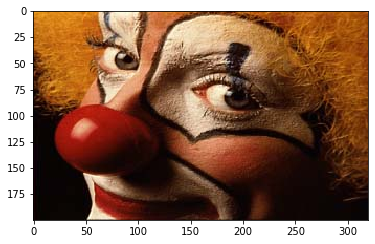

In [9]:
ij.py.show(clown)

Se puede observar que con el método to_java podemos transformar de un tipo de dato numpy (matriz) a uno de java:

In [10]:
type(clown)

numpy.ndarray

In [11]:
type(ij.py.to_java(clown))

<java class 'net.imglib2.python.ReferenceGuardingRandomAccessibleInterval'>

In [12]:
type(ij.op().transform().flatIterableView(ij.py.to_java(clown)))

<java class 'net.imglib2.view.IterableRandomAccessibleInterval'>

Algo interesante es que el tipo de dato de java tambien puede ser de dos tipos distintos:
* ReferenceGuardingRandomAccessibleInterval
* IterableRandomAccessibleInterval

Observando la ayuda del método Otsu vemos que existen 3 formas de llamar la operación, algunas aceptan datos de tipo Iterable y otras de tipo Random, sin embargo no es posible saber con exactitud cual de ellas estamos llamando desde PyImageJ, se hace la suposición de que se toma el indicado para el tipo de argumentos que le indiquemos. Intentemos hacer el filtro a nuestra imagen de payaso:

In [13]:
# image = ij.op().threshold().otsu(clown)
image = ij.op().run("threshold.otsu", ij.py.to_java(clown))

In [14]:
ij.py.show(image, cmap='gray')

NotImplementedError: Cannot convert dtype to ImgLib2 type yet: bool

El error obtenido resulta del propio motor de procesamiento de imágenes de ImageJ: [ImgLib2](https://imagej.net/libs/imglib2/) por lo que muchos resultados son en esencia datos de un 3er tipo. Hasta este punto no fue posible encontrar una función que adecuará el tipo de dato que resulto de hacer el threshold otsu a la foto de payaso. Intentando adecuar los tipos de datos bajo la suposición del mejor método:

In [ ]:
result = ij.py.new_numpy_image(clown)

imgIterable = ij.op().transform().flatIterableView(ij.py.to_java(clown))
resIterable = ij.op().transform().flatIterableView(ij.py.to_java(result))

ij.op().threshold().otsu(resIterable)

ij.py.show(resIterable, cmap='gray')

La imagén resultante no se aprecia como [debería](https://nbviewer.jupyter.org/github/imagej/tutorials/blob/master/notebooks/1-Using-ImageJ/Ops/threshold/threshold.ipynb). Para descartar un error en el funcionamiento de PyImageJ replicamos otro [tutorial](https://github.com/imagej/i2k-2018/blob/master/Simple-ImageJ-Python-Demo.ipynb) en el que se hace uso de un filtro basado en diferencia gaussiana:

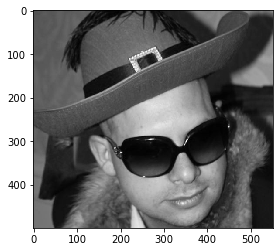

In [15]:
from skimage import io
import numpy as np
img = io.imread('https://samples.fiji.sc/new-lenna.jpg')
img = np.mean(img[500:1000,300:850], axis=2)
ij.py.show(img, cmap='gray')

In [16]:
np.shape(img) #tamaño de la matriz de pixeles

(500, 550)

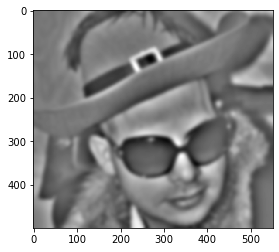

In [17]:
result = np.zeros(img.shape)
sigma1 = 20
sigma2 = 4
ij.op().filter().dog(
    ij.py.to_java(result),
    ij.py.to_java(img),
    sigma1,
    sigma2)
ij.py.show(result, cmap='gray')

In [18]:
type(img)

numpy.ndarray

Observamos que después de aplicar el filtro como una operación desde ImageJ se obtuvo un buen resultado y esta vez se concervo el tipo de dato numpy.ndarray.

Las diferentes transformaciones entre datos y operaciones que funcionen en PyImageJ no están documentadas en ningun lado, ni siquiera en la [wiki](https://imagej.net/). Lo que generalmente se menciona es que al tener una versión local de fiji tenemos acceso a todas la operaciones, plugins, métodos y macros de ImageJ pero no se menciona la forma correcta o sintáxis adecuada para ello. 

Hasta el momento las operaciones utilizadas aparecen listadas como métodos [net.imageJ.ops](https://javadoc.scijava.org/ImageJ/net/imagej/ops/package-summary.html) que encontramos en la API.

A su vez existen otras API:
* Una especifica para [Fiji](https://javadoc.scijava.org/Fiji/) de la cual desconocemos la forma de acceso de PyImageJ
* Una para modulos [IJ](https://imagej.nih.gov/ij/developer/api/ij/module-summary.html) utilizados en [scripts](https://imagej.net/tutorials/imagej2-python) programados en diferentes lenguajes como [Jython](https://imagej.net/scripting/jython/) que se usan dentro de ImageJ 

Nuevamente intenamos hacer un threshold sobre nuestra imagen:

In [19]:
img_iterable = ij.op().transform().flatIterableView(ij.py.to_java(img))
img_th = ij.op().threshold().otsu( img_iterable )

In [20]:
type(img_th)

<java class 'net.imglib2.img.array.ArrayImg'>

Volvemos a obtener el mismo error:

In [21]:
ij.py.show(img_th, cmap="gray")

NotImplementedError: Cannot convert dtype to ImgLib2 type yet: bool

Ya que nuestros esfuerzos hasta ahora no han rendido frutos, probaremos otra opción: utilizar [macros](https://imagej.nih.gov/ij/developer/macro/macros.html) con ayuda de este [tutorial](https://github.com/imagej/i2k-2020-pyimagej/blob/main/05-Macros-Plugins-and-Scripts.ipynb). 

El lenguaje de macros de ImageJ nació como una acercamiento de alto nivel a las funcionalidades de ImageJ, en general con la implementación de las operaciones (que previamente intentamos pero no parecen funcionar del todo bien) se esperaba hacer a un lado las macros, pero su implementación es tan popular y utilizada aún hoy en día que se quedó como una opción permanente.

ImageJ tiene una opción para grabar los pasos que realizamos en el launcher de windows, de modo que todos los filtros y pasos de procesamiento que realicemos se traducen a código de macro que podemos implementar fácilmente en PyImageJ con la función run_macro().

Al momento que llamamos ImageJ colocamos como argumento "headless = False" esto quiere decir que a partir del llamado de algunas funciones utilzadas de las macros se mandará a llamar al programa ImageJ que está corriendo localmente en python y nos mostrará algunas operaciones y resultados. Sin más que agregar, se prueba utilizar una macro para abrir, filtrar y analizar las particulas de una imagen:

In [22]:
from scyjava import jimport #para observar la ventana 
WindowManager = jimport('ij.WindowManager') # un método de la api original (https://imagej.nih.gov/ij/developer/api/ij/ij/WindowManager.html)
ij.py.run_macro("""open("C:/Users/JMCas/Downloads/dust_promété001.tif");""") #Macro sencilla para abrir la imagen
blobs = WindowManager.getCurrentImage() #extraemos la imagen de la ventana, ya que no la abrimos localmente
print(blobs)

img["dust_promété001.tif" (-6), 8-bit, 2048x2048x1x1x1]


Podemos llamar la imagen al mismo tiempo que esta abierta en la ventana:

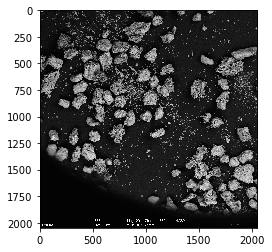

In [23]:
ij.py.show(blobs, cmap = 'gray')

Declaramos la macro y ejecutamos:

In [24]:
macro = """
run("8-bit");
setAutoThreshold("Triangle");
//run("Threshold...");
//setThreshold(0, 151);
setOption("BlackBackground", true);
run("Convert to Mask");
run("Watershed");
run("Set Measurements...", "area mean center perimeter fit shape display redirect=None decimal=5");
run("Set Scale...", "distance=1324 known=1 pixel=1 unit=mm global");
run("Analyze Particles...", "size=.00-1 circularity=0.10-1.00 show=[Overlay Outlines] display exclude clear include");
saveAs("Results","results.csv" );
"""
ij.py.run_macro(macro)

<java object 'org.scijava.script.ScriptModule'>

Automaticamente se abre la ventana con resultados del análisis de particulas, además de guardan en un archivo [csv](https://es.wikipedia.org/wiki/Valores_separados_por_comas) al que podemos acceder con excel. Mostramos la imagén filtrada:

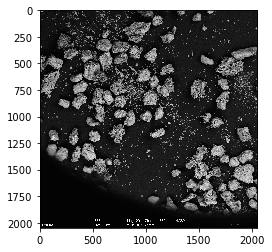

In [25]:
result = WindowManager.getCurrentImage()
result = ij.py.show(result, cmap='gray')

Para correr otras macros lo recomendable es cerrar la ventana con la que estabamos trabajando:

In [26]:
ij.window().clear()

Sin embargo este procedimiento no cierra del todo las ventanas abiertas, solo los datos en memoria:

In [27]:
print(ij.py.from_java(ij.window().getOpenWindows()))

[]


Para cerrar las ventanas automaticamente podemos añadir codigo a la macro como sigue:
* run("Clear Results");
* Close)();

Un tutorial con un procemiento similar se encuentra [aquí](https://www.fzu.cz/~dominecf/granulo/index.html), aunque se recurre a una combinación de macros y Jython. En caso de no usar el *recorder* de Fiji, podemos encontrar una lista de macros [aquí](https://imagej.nih.gov/ij/developer/macro/functions.html).

Aunque este primer acercamiento utilizando PyImageJ tuvo ciertos resultados, las limitaciones de tratar de combinar un software basado en Java con Python y la poca documentación encontrada solos nos dieron un mejor motivo para incursionar en herramientas diseñadas especificamente para Python, de modo que realizamos otro acercamiento, está vez con el módulo OpenCV.

# Segundo Acercamiento: OpenCV

Open CV es la abreviatura de Open source vision library, como su nombre lo indica es una librería construida para proveer de una herramienta para las aplicaciones que involucren visión para así acelerar el uso de la percepción a partir de la tecnología en productos.

Mediante sus más de 2500 algoritmos, es posible usar el programa para reconocer rostros, clasificar acciones en videos, seguir movimientos de cámara, objetos móviles, o encontrar imágenes similares a otra en una base de datos.
Así mismo el software gana terreno en aplicaciones tales como detección de intrusos en cámaras de vigilancia, navegación de robots.

La interacción con esta librería puede darse por medio de C++, Phyton, Java y Matlab.
Para las aplicaciones de este proyecto se optó por la interacción por medio de Phyton.
A su vez Phyton es un lenguaje de programación de alto nivel, el cual destaca por la ra de su aplicación, así como el mantenimiento del programa, además de la compatibilidad con múltiples herramientas y librerías.

Nota: OpenCV puede ejecutarse desde Jupyter pero las imágenes se verán como una ventana de windows.

In [5]:
#Importamos módulos
import cv2
import numpy as np
from skimage import color

#leemos la imagen, se pasa la ruta y el modo de lectura (escala de grises) como argumentos
img = cv2.imread('C:/Users/JMCas/Downloads/dust_promete004.tif',cv2.IMREAD_GRAYSCALE)

cropped = img[0:1920] # Recortamos la imagen hasta cierta altura en pixeles para excluir la escala (area efectiva)
cropped2 = cropped.copy() # Creamos una copia pues OpenCV reescribira la imagen al realizar contornos

#Mostramos las imagenes
cv2.namedWindow('img', cv2.WINDOW_NORMAL) 
cv2.resizeWindow('img', 1200, 1000)

cv2.imshow("img", img)
cv2.waitKey(0)

cv2.imshow("img", cropped)
cv2.waitKey(0)

cv2.destroyAllWindows()

## Método Treshold

Es un filtro para la imagen, en el cual se define un valor del threshold, para cada pixel de la imagen se evalúa, de modo que, si es mayor que el valor colocado en el treshold, pasa por el filtro estableciéndose como 1, pero si es menor se establece en 0. Para realizar un threshold, es preciso que la imagen se encuentre en escala de grises.

La función encargada de realizar este proceso consta de 4 argumentos, de los cuales, la imagen es el primero de ellos, el segundo es el valor del threshold, el cual será usado para hacer la clasificación de los pixeles, el tercer argumento es el valor máximo, el cual se asigna a los pixeles que superen el valor asignado al threshold, finalmente, el cuarto argumento es para seleccionar el tipo de threshold que se aplicará a la imagen, existiendo:

- cv.THRESH_BINARY
- cv.THRESH_BINARY_INV
- cv.THRESH_TRUNC
- cv.THRESH_TOZERO
- cv.THRESH_TOZERO_INV

<img src="https://docs.opencv.org/4.5.3/threshold.jpg" width=500 height=500 />

Los resultados que presenta cada tipo de threshold ante la misma entrada pueden verse en la imagen anterior con fines comparativos.

Así mismo, las siguientes gráficas representan la forma en que actúan los distintos métodos ante una misma entrada y valores del threshold. La función será llamada partiendo de la siguiente forma general, solo indicando el tipo de threshold a utilizar:

```Python
cv.threshold(src, thresh, maxval, type[, dst]) ->	retval, dst
```

Para los propósitos del presente proyecto se usó principalmente la función threshold binaria.

### Threshold binario

se define por la siguiente función.

```
dst(x,y)={maxval if src(x,y)>thresh
   		       0 otherwise
```                           
Lo cual se traduce en establecer un valor para el pixel siempre y cuando supere el valor establecido para el threshold y establecerse en 0 en caso contrario, cabe recordar que esos valores se establecen desde el momento en que se llama a la función.

<img src="https://docs.opencv.org/4.5.3/threshold.png" width=500 height=500 />

[Otros métodos.](https://docs.opencv.org/4.0.1/d7/d4d/tutorial_py_thresholding.html)

In [6]:
#Aplicamos el método de Threshold binario, métodos adapativos y de otsu no nos ayudan mucho 
#ya que queremos los bordes de las particulas
ret1, thresh = cv2.threshold(cropped, 40 , 255, cv2.THRESH_BINARY)

#creamos una matriz que funciona de kernel para la operación de apertura
# Info: 
# https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)) 

opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 1)

#Mostramos las imagenes
cv2.namedWindow('img', cv2.WINDOW_NORMAL) #Mostramos las imagenes
cv2.resizeWindow('img', 1200, 1000)

cv2.imshow('img', thresh)
cv2.waitKey(0)
   
cv2.imshow('img', opening)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Transformaciones morfológicas

### Floodfill

In [7]:
# Queremos rellenar los huecos internos de las particulas
# El metodo de cierre (closing) es buena opcion pero perdemos info y precision, así que optamos por el método floodfill
# https://learnopencv.com/filling-holes-in-an-image-using-opencv-python-c/

im_floodfill = opening.copy()

h,w = opening.shape[:2]
mask = np.zeros((h+2,w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255)

im_floodfill_inv = cv2.bitwise_not(im_floodfill)

im_out = opening | im_floodfill_inv

# método de watershed
# https://docs.opencv.org/4.0.1/d3/db4/tutorial_py_watershed.html


sure_bg = cv2.dilate(im_out ,kernel,iterations=2)

dist_transform = cv2.distanceTransform(im_out ,cv2.DIST_L2,3)

ret2, sure_fg = cv2.threshold(dist_transform,0.15*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg,sure_fg)

ret3, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

img1 = cv2.cvtColor(cropped, cv2.COLOR_GRAY2BGR)

markers = cv2.watershed(img1,markers)

img1[markers == -1] = [0,255,233]

img2 = color.label2rgb(markers, bg_label=0)


#Mostramos las imagenes
cv2.namedWindow('img', cv2.WINDOW_NORMAL) #Mostramos las imagenes
cv2.resizeWindow('img', 1200, 1000)

cv2.imshow('img', im_out)
cv2.waitKey(0)

cv2.imshow('img', img1)
cv2.waitKey(0)

cv2.imshow('img', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Watershed

La función *watershed* realiza una segmentación de imágenes basada en marcadores utilizando el algoritmo de cuencas hidrográficas [watershed](https://docs.opencv.org/master/d3/d47/group__imgproc__segmentation.html#ga3267243e4d3f95165d55a618c65ac6e1).

Antes de pasar la imagen a la función, se debe delinear aproximadamente las regiones deseadas en los marcadores de imagen con índices positivos (mostrado dentro de este código). Entonces, cada región se representa como uno o más componentes conectados con los valores de píxel 1, 2, 3, etc. que se marcan usando las herramientas de contornos (findcontours y drawcontours). Los marcadores son referencias de las futuras regiones de la imagen. Todos los demás píxeles de los marcadores, cuya relación con las regiones delineadas no se conoce y deben #ser definidos por el algoritmo, deben establecerse en ceros. En la salida de la función, cada píxel de los marcadores se establece en un valor de los componentes de referencia que crea un “llenado de piscina” en la imagen. 

En Python tiene la siguiente estructura:
```Python
cv.watershed(image, markers)
```
- image: es la imagen de entrada en 8 bits
- markers: Es la salida de mapa de pixeles “llenados”

### Contornos

Los contornos se pueden explicar simplemente como una curva que une todos los puntos continuos (a lo largo del límite), que tienen el mismo color o intensidad. Los contornos son una herramienta útil para el análisis de formas y la detección y reconocimiento de objetos. Las imágenes binarias tienen mejores resultados. Por lo tanto, antes de encontrar contornos, es conveniente usar el método de threshold  o la detección de bordes.

Para esta tarea usamos las funciones [findContours](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) y [drawContours](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) incluidas en las funciones de dibujo de Open CV es importante recordar que las funciones trabajan encontrando las partes blancas de una imagen que contrastan con un fondo negro, por ello, la imagen debe ser filtrada con anterioridad.

En Python la funcion findContours tiene la siguiente estructura:
```Python
cv.findContours(imagen, modo, método)
```

#### Los [modos](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71 ) del algoritmo recuperación de contorno son:

- cv.RETR_EXTERNAL, recupera solo los bordes externos
- cv.RETR_LIST, recupera todos los contornos sin establecer jerárquias.
- cv.RETR_CCOMP, recupera todos los contornos y los organiza en una jerarquía de dos niveles.

#### Los [métodos](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff ) de aproximación de contornos son:

- cv.CHAIN_APPROX_NONE, que guarda todos los puntos del contorno.
- cv.CHAIN_APPROX_SIMPLE que hace una aproximación con los puntos horizontales, verticales y diagonales de la figura
- cv.CHAIN_APPROX_TC89_L1 que aplica el método Teh-Chin

La función [drawContours](https://docs.opencv.org/master/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) tiene la siguiente estructura:
```Python
cv.drawContours(imagen, contours, contourIdx, color)
```
- imagen: Imagen de destino. 
- contours: Todos los contornos de entrada. Cada contorno se almacena como un vector de puntos. 
- contourIdx: Parámetro que indica un contorno a dibujar. Si es negativo, se dibujan todos los contornos. 
- color: Color de los contornos en formato RGB o BGR.


In [8]:
img3 = img1.copy()

markers1 = markers.astype(np.uint8)

ret, m2 = cv2.threshold(markers1, 0, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU) # Filtramos los contornos resultantes de watershed

#Dibujamos objetos de tipo contorno sobre los dibujados anteriormente
contours, hierarchy = cv2.findContours(m2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)    
for c in contours:
    cv2.drawContours(img3, c, -1, (255,255,255), 3)

#Estos objetos de tipo contorno son filtrables por su tamaño
big_contours = [c for c in contours if cv2.contourArea(c) >= 1000]

#Dibujamos rectangulos de área mínima utilizando las propiedades de los objetos de tipo contorno
for i in range(0,len(big_contours)):
    rect = cv2.minAreaRect(big_contours[i])
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    img_result = cv2.drawContours(cropped2,[box],0,(255,0,255),2)


#Mostramos las imagenes
cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.resizeWindow('img', 1200, 1000)

cv2.imshow('img', m2)
cv2.waitKey(0)

cv2.imshow('img', img3)
cv2.waitKey(0)

cv2.imshow('img', cropped2)
cv2.waitKey(0)


cv2.destroyAllWindows()


#### Bibliografía
1. "Calibración de datos de nubes de ceniza para los volcanes Mexicanos", Laboratorio Nacional de Observación de la Tierra, Instituto de Geografía, UNAM. Abril de 2019. Recuperado de: https://www1.cenapred.unam.mx/SUBCUENTA/6a%20SESI%C3%93N%20EXTRAORDINARIA/3.%20GOES_16/CENIZA_REPORTE_3.4_ABRIL_15_2019_BUENO_CON_%C3%8DNDICE+TABLAS+FIGURAS_C.pdf
